<a href="https://colab.research.google.com/github/edilmita/edilmita/blob/main/Classification_with_K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

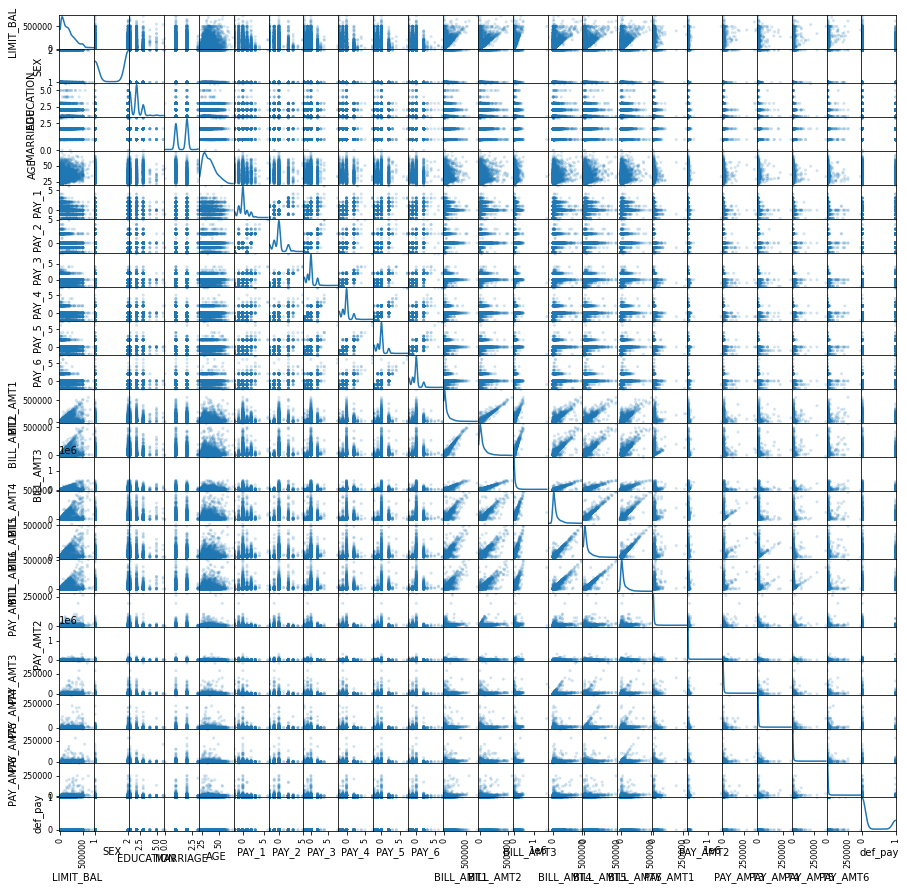

In [16]:
#######################
# Importing Libraries #
#######################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

#############################################
# Importing the Credit Card Default Dataset #
#############################################

mydata = pd.read_csv('/content/credit_defaults.csv')
mydata = mydata.sample(n=2000,replace =False,random_state=1)
mydata.head(5)

#ID	    LIMIT_BAL	    SEX	EDUCATION	MARRIAGE	AGE	PAY_0	PAY_2	PAY_3	PAY_4	...	BILL_AMT4	BILL_AMT5	BILL_AMT6	PAY_AMT1	PAY_AMT2	PAY_AMT3	PAY_AMT4	PAY_AMT5	PAY_AMT6	default_payment_next_month
#10747	10748	310000	1	  3	1	32	0	0	0	0	...	84373	57779	14163	8295	6000	4000	3000	1000	2000	0
#12573	12574	10000	  2	  3	1	49	-1	-1	-2	-1	...	1690	1138	930	0	0	2828	0	182	0	1
#29676	29677	50000	  1	  2	1	28	-1	-1	-1	0	...	45975	1300	43987	0	46257	2200	1300	43987	1386	
#8856	  8857	80000	  2	  3	1	52	2	2	3	3	...	40748	39816	40607	3700	1600	1600	0	1600	1600	1
#21098	21099	270000	1	  1	2	34	1	2	0	0	...	22448	15490	17343	0	4000	2000	0	2000	2000	0
#5 rows × 25 columns

#displays the last five rows of the data frame by default. 

mydata.tail()

#1 to 5 of 5 entries

#index	ID	LIMIT_BAL	SEX	EDUCATION	MARRIAGE	AGE	PAY_0	PAY_2	PAY_3	PAY_4	PAY_5	PAY_6	BILL_AMT1	BILL_AMT2	BILL_AMT3	BILL_AMT4	BILL_AMT5	BILL_AMT6	PAY_AMT1	PAY_AMT2
#23295	23296	160000	2	1	2	25	-1	0	-1	-1	0	0	6087	1934	11376	2199	10856	0	1000	11426
#15148	15149	250000	1	1	1	53	-2	-2	-2	-2	-2	-2	0	0	0	0	0	0	0	0
#18666	18667	50000	2	1	2	23	-1	-1	-2	-2	-2	-2	2332	0	0	0	0	0	0	0
#3415	3416	200000	2	2	1	37	0	0	0	0	0	0	184144	189158	190569	191730	171269	151550	8017	8000
#18714	18715	420000	2	1	2	28	0	0	-1	0	0	0	7880	4623	64513	65592	57438	31029	1010	6451

mydata.info()

#<class 'pandas.core.frame.DataFrame'>
#Int64Index: 2000 entries, 10747 to 18714
#Data columns (total 25 columns):
# #   Column                      Non-Null Count  Dtype
#---  ------                      --------------  -----
# 0   ID                          2000 non-null   int64
# 1   LIMIT_BAL                   2000 non-null   int64
# 2   SEX                         2000 non-null   int64
# 3   EDUCATION                   2000 non-null   int64
# 4   MARRIAGE                    2000 non-null   int64
# 5   AGE                         2000 non-null   int64
# 6   PAY_0                       2000 non-null   int64
# 7   PAY_2                       2000 non-null   int64
# 8   PAY_3                       2000 non-null   int64
# 9   PAY_4                       2000 non-null   int64
# 10  PAY_5                       2000 non-null   int64
# 11  PAY_6                       2000 non-null   int64
# 12  BILL_AMT1                   2000 non-null   int64
# 13  BILL_AMT2                   2000 non-null   int64
# 14  BILL_AMT3                   2000 non-null   int64
# 15  BILL_AMT4                   2000 non-null   int64
# 16  BILL_AMT5                   2000 non-null   int64
# 17  BILL_AMT6                   2000 non-null   int64
# 18  PAY_AMT1                    2000 non-null   int64
# 19  PAY_AMT2                    2000 non-null   int64
# 20  PAY_AMT3                    2000 non-null   int64
# 21  PAY_AMT4                    2000 non-null   int64
# 22  PAY_AMT5                    2000 non-null   int64
# 23  PAY_AMT6                    2000 non-null   int64
# 24  default_payment_next_month  2000 non-null   int64
# dtypes: int64(25)
# memory usage: 406.2 KB

# Now we can get a descriptive statistics summary of a given dataframe

mydata.describe()


#ID	LIMIT_BAL	SEX	EDUCATION	MARRIAGE	AGE	PAY_0	PAY_2	PAY_3	PAY_4	...	BILL_AMT4	BILL_AMT5	BILL_AMT6	PAY_AMT1	PAY_AMT2	PAY_AMT3	PAY_AMT4	PAY_AMT5	PAY_AMT6	default_payment_next_month
#count	2000.000000	2000.000000	2000.000000	2000.000000	2000.000000	2000.000000	2000.000000	2000.000000	2000.000000	2000.000000	...	2000.000000	2000.000000	2000.000000	2000.000000	2.000000e+03	2000.000000	2000.000000	2000.000000	2000.000000	2000.000000
#mean	14950.749000	171825.000000	1.603000	1.853000	1.555000	35.458000	-0.024500	-0.138500	-0.179500	-0.213000	...	44390.095500	41502.586000	39643.917000	5153.111500	6.362411e+03	6096.214000	5091.073500	5043.292500	5738.555500	0.219500
#std	8624.251173	131598.930521	0.489398	0.798567	0.516825	9.144892	1.103861	1.163613	1.177698	1.166753	...	65827.281839	61928.132672	60472.016246	13065.162427	4.014712e+04	21880.625777	16197.840731	16448.820691	21310.318739	0.414011
#min	3.000000	10000.000000	1.000000	1.000000	0.000000	21.000000	-2.000000	-2.000000	-2.000000	-2.000000	...	-81334.000000	-15306.000000	-51443.000000	0.000000	0.000000e+00	0.000000	0.000000	0.000000	0.000000	0.000000
#25%	7404.000000	60000.000000	1.000000	1.000000	1.000000	28.000000	-1.000000	-1.000000	-1.000000	-1.000000	...	2939.500000	2158.750000	1319.250000	1000.000000	9.947500e+02	445.500000	328.250000	260.250000	166.750000	0.000000
#50%	14889.500000	140000.000000	2.000000	2.000000	2.000000	34.000000	0.000000	0.000000	0.000000	0.000000	...	19454.000000	18652.000000	17621.500000	2022.500000	2.031500e+03	1843.000000	1597.500000	1500.000000	1464.000000	0.000000
#75%	22510.250000	250000.000000	2.000000	2.000000	2.000000	41.000000	0.000000	0.000000	0.000000	0.000000	...	53394.250000	51005.500000	49484.750000	5000.000000	5.000000e+03	5000.000000	4295.500000	4207.750000	4000.000000	0.000000
#max	29993.000000	730000.000000	2.000000	6.000000	3.000000	71.000000	6.000000	5.000000	8.000000	7.000000	...	487066.000000	489200.000000	513798.000000	276698.000000	1.684259e+06	400972.000000	331788.000000	379267.000000	403500.000000	1.000000
#8 rows × 25 columns

#There are 2000 individual credit card customers.

#The average value for a credit card limit is 171,825. 

#The standard deviation is unusually large, the max value is 730,000.

#Education Level is mostly graduate school and university.

#Most of the clients are either married or single.

#The average age is 35.5 years, with a standard deviation of 9.2.

#Because the value 0 for default payment means 'not default' and value 1 means 'default', 
#the mean of 0.219 means that there are 22.1% of credit card agreements that will default 
#the following month (this will be verified in the subsequent sections of this evaluation).

#Executes Python function provided by the user on a column (columns) of DataFrame connected 
#to its input port. 

mydata.columns

#Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
#       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
#       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
#       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
#       'default_payment_next_month'],
#      dtype='object')

mydata.index = mydata['ID']
mydata.head(3)

#	ID	LIMIT_BAL	SEX	EDUCATION	MARRIAGE	AGE	PAY_0	PAY_2	PAY_3	PAY_4	.	BILL_AMT4	BILL_AMT5	BILL_AMT6	PAY_AMT1	PAY_AMT2	PAY_AMT3	PAY_AMT4	PAY_AMT5	PAY_AMT6	default_payment_next_month																					
#ID
#10748	10748	310000	1	3	1	32	0	0	0	0	...	84373	57779	14163	8295	6000	4000	3000	1000	2000	0
#12574	12574	10000	2	3	1	49	-1	-1	-2	-1	...	1690	1138	930	0	0	2828	0	182	0	1
#29677	29677	50000	1	2	1	28	-1	-1	-1	0	...	45975	1300	43987	0	46257	2200	1300	43987	1386	0
#3 rows × 25 columns

#Remove columns ID and corresponding axis

mydata.drop('ID',axis=1,inplace=True)
mydata.head(1)

#	LIMIT_BAL	SEX	EDUCATION	MARRIAGE	AGE	PAY_0	PAY_2	PAY_3	PAY_4	PAY_5	...	BILL_AMT4	BILL_AMT5	BILL_AMT6	PAY_AMT1	PAY_AMT2	PAY_AMT3	PAY_AMT4	PAY_AMT5	PAY_AMT6	default_payment_next_month
#ID																					
#10748	310000	1	3	1	32	0	0	0	0	0	...	84373	57779	14163	8295	6000	4000	3000	1000	2000	0
#1 rows × 24 columns

mydata.columns

#Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
#       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
#       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
#       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
#       'default_payment_next_month'],
#      dtype='object')

# returns the summatory of a Data Frame object where all the values are replaced with a Boolean value True for NULL values, 
# and otherwise False.

mydata.isnull().sum()

#LIMIT_BAL                     0
#SEX                           0
#EDUCATION                     0
#MARRIAGE                      0
#AGE                           0
#PAY_0                         0
#PAY_2                         0
#PAY_3                         0
#PAY_4                         0
#PAY_5                         0
#PAY_6                         0
#BILL_AMT1                     0
#BILL_AMT2                     0
#BILL_AMT3                     0
#BILL_AMT4                     0
#BILL_AMT5                     0
#BILL_AMT6                     0
#PAY_AMT1                      0
#PAY_AMT2                      0
#PAY_AMT3                      0
#PAY_AMT4                      0
#PAY_AMT5                      0
#PAY_AMT6                      0
#default_payment_next_month    0
#dtype: int64

# We removed the rows that contains NULL values and sumariza the 
# 1 = male; 2 = female

mydata['SEX'].value_counts(dropna=False)

# 1 = male; 2 = female

#2    1206
#1     794
#Name: SEX, dtype: int64

mydata['EDUCATION'].value_counts(dropna=False)

#1 = graduate school; 2 = university; 3 = high school; 4 = others; 5=unknown, 6=unknown

# 2    925
# 1    715
# 3    325
# 5     18
# 4     13
# 6      4
# Name: EDUCATION, dtype: int64

# renames Columns

mydata = mydata.rename(columns={'default_payment_next_month': 'def_pay', 'PAY_0':'PAY_1'})

mydata.head()

#1 to 5 of 5 entries
#Filter

#ID	LIMIT_BAL	SEX	EDUCATION	MARRIAGE	AGE	PAY_1	PAY_2	PAY_3	PAY_4	PAY_5	PAY_6	BILL_AMT1	BILL_AMT2	BILL_AMT3	BILL_AMT4	BILL_AMT5	BILL_AMT6	PAY_AMT1	PAY_AMT2	PAY_AMT3
#10748	310000	1	3	1	32	0	0	0	0	0	0	172772	152397	110375	84373	57779	14163	8295	6000	4000
#12574	10000	2	3	1	49	-1	-1	-2	-1	2	2	32	-358	-748	1690	1138	930	0	0	2828
#29677	50000	1	2	1	28	-1	-1	-1	0	-1	-1	430	0	46257	45975	1300	43987	0	46257	2200
#8857	80000	2	3	1	52	2	2	3	3	3	2	36649	39448	40101	40748	39816	40607	3700	1600	1600
#21099	270000	1	1	2	34	1	2	0	0	

# Display Columns

mydata.columns

# Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
#      'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
#       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
#       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
#      dtype='object')

###################################
# Data Visualisation and Analysis #
###################################


from pandas.plotting import scatter_matrix
scatter_matrix(mydata, alpha=0.2, figsize=(15,15), diagonal= 'kde' )
plt.show()

